In [1]:
import pycromanager as pym
from pycromanager import Core
import numpy as np
from matplotlib.pyplot import *


In [3]:
core = Core()

# osc-lsm info

In [8]:
dev = core.get_loaded_devices()

In [8]:
def obj_to_lst(obj):
    return [obj.get(i) for i in range(obj.size())]

In [13]:
obj_to_lst(dev)

['COM7',
 'OScHub',
 'OSc-LSM',
 'OSc-Magnifier',
 'NIMultiAnalogDev1',
 'LED-Dev1ao0',
 'PockelsCell-Dev1ao1',
 'Shutters-DigitalIODev1',
 'UniblitzShutter',
 'WhiteLED',
 'QCamera',
 'TigerCommHub',
 'XYStage:XY:31',
 'ZStage:Z:32',
 'ZStage:F:32',
 'Turret:O:35',
 'DCC100',
 'Core']

In [16]:
osc = core.get_device_property_names('OSc-LSM')

In [25]:
osc_props = obj_to_lst(osc)

In [22]:
for prop in osc_props:
    print(prop, "val:", core.get_property('OSc-LSM', prop), "\n")

Binning val: 1 

Clock val: OpenScan-NIDAQ-at-PXI2Slot2 

Detector val: OpenScan-NIDAQ-at-PXI2Slot2 

Exposure val: 0.0000 

LSM-PixelRateHz val: 1000000.0000 

LSM-Resolution val: 1024 

LSM-ZoomFactor val: 1.0000 

PXI2Slot2-Acq Buffer Size (lines) val: 8 

PXI2Slot2-EnableChannel0 val: Yes 

PXI2Slot2-EnableChannel1 val: No 

PXI2Slot2-EnableChannel2 val: No 

PXI2Slot2-EnableChannel3 val: No 

PXI2Slot2-EnableChannel4 val: No 

PXI2Slot2-EnableChannel5 val: No 

PXI2Slot2-EnableChannel6 val: No 

PXI2Slot2-EnableChannel7 val: No 

PXI2Slot2-GalvoOffsetX (degree) val: 0.0000 

PXI2Slot2-GalvoOffsetY (degree) val: 0.0000 

PXI2Slot2-Input Voltage Range val: 10.0000 

PXI2Slot2-Line Delay (pixels) val: 50 

PXI2Slot2-Parking Position X (pixels) val: 0 

PXI2Slot2-Parking Position Y (pixels) val: 0 

PXI2Slot2-ScannerOnly val: No 

Scanner val: OpenScan-NIDAQ-at-PXI2Slot2 

TransposeCorrection val: 0 

TransposeMirrorX val: 0 

TransposeMirrorY val: 0 

TransposeXY val: 0 



In [23]:
core.get_x_position()

-1610.8600000000001

In [24]:
core.get_y_position()

12032.77

In [26]:
xystage = core.get_device_property_names('XYStage:XY:31')

In [28]:
xystage_prop = obj_to_lst(xystage)

In [29]:
for prop in xystage_prop:
    print(prop, "val:", core.get_property('XYStage:XY:31', prop), "\n")

AccelerationX-AC(ms) val: 101 

AccelerationY-AC(ms) val: 101 

AxisLetterX val: X 

AxisLetterY val: Y 

AxisPolarityX val: Normal 

AxisPolarityY val: Normal 

BacklashX-B(um) val: 40.0000 

BacklashY-B(um) val: 40.0000 

Description val: ASI XY Stage Xaxis=X Yaxis=Y HexAddr=31 

DriftErrorX-E(um) val: 0.4000 

DriftErrorY-E(um) val: 0.4000 

EnableAdvancedProperties val: No 

FinishErrorX-PC(um) val: 0.0240 

FinishErrorY-PC(um) val: 0.0240 

FirmwareBuild val: STD_XY_LED 

FirmwareDate val: Jul 28 2020:16:09:10 

FirmwareVersion val: 3.3200 

JoystickEnabled val: Yes 

JoystickFastSpeed val: 80.0000 

JoystickReverse val: No 

JoystickRotate val: No 

JoystickSlowSpeed val: 3.0000 

LowerLimX(mm) val: -532.3190 

LowerLimY(mm) val: -460.6487 

MaintainStateX-MA val: 0 - Motors off but correct drift for 0.5 sec 

MaintainStateY-MA val: 0 - Motors off but correct drift for 0.5 sec 

MotorOnOffX val: On 

MotorOnOffY val: On 

MotorSpeedMaximumX(mm/s) val: 8.5763 

MotorSpeedMaximumY(

In [34]:
#256
core.get_pixel_size_um()

2.21

In [35]:
#512
core.get_pixel_size_um()

1.105

In [36]:
#1024
core.get_pixel_size_um()

0.5525

In [37]:
#2048
core.get_pixel_size_um()

0.27625

# roi try

In [36]:
core.set_roi(3,5,256,256)

#pixel (local)point of image, pixel (local)point of image, pixel size, pixel size

In [37]:
q = core.get_roi()

In [38]:
def roi_test():
    q = core.get_roi()
    print("shape:", q.to_string(), "\n",
          "center x:", q.get_center_x(), "\n",
          "center y:", q.get_center_y(), "\n",
          "max x:", q.get_max_x(), "\n",
          "max y:", q.get_max_y(), "\n",
          "min x:", q.get_min_x(), "\n",
          "min y:", q.get_min_y(), "\n",
          "roi x pos:", q.get_x(), "\n",
          "roi y pos:", q.get_y(), "\n")

In [41]:
#everything based on pixels of current image (==| array points)
#stage position doesn't move at all

roi_test()

shape: java.awt.Rectangle[x=3,y=5,width=256,height=256] 
 center x: 131 
 center y: 133 
 max x: 259 
 max y: 261 
 min x: 3 
 min y: 5 
 roi x pos: 3 
 roi y pos: 5 



In [31]:
core.get_x_position()

6.029999999999999

In [19]:
core.snap_image()

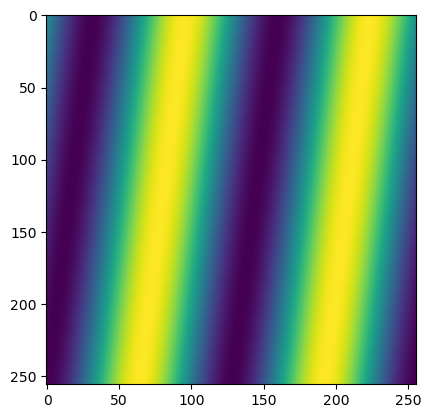

In [20]:
tagged_image = core.get_tagged_image()
pixels = np.reshape(tagged_image.pix,
                        newshape=[tagged_image.tags['Height'], tagged_image.tags['Width']])
imshow(pixels)

In [42]:
core.clear_roi()

In [43]:
roi_test()

shape: java.awt.Rectangle[x=0,y=0,width=512,height=512] 
 center x: 256 
 center y: 256 
 max x: 512 
 max y: 512 
 min x: 0 
 min y: 0 
 roi x pos: 0 
 roi y pos: 0 



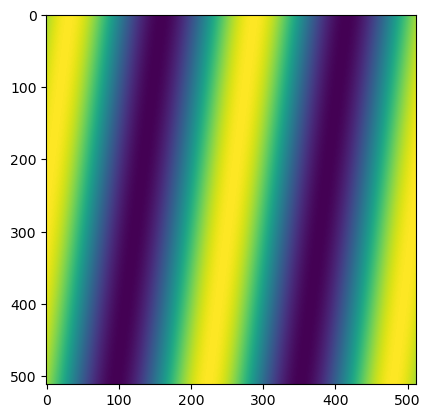

In [44]:
core.snap_image()
tagged_image = core.get_tagged_image()
pixels = np.reshape(tagged_image.pix,
                        newshape=[tagged_image.tags['Height'], tagged_image.tags['Width']])
imshow(pixels)

In [46]:
dev = core.get_loaded_devices()
obj_to_lst(dev)

['DHub',
 'Camera',
 'Dichroic',
 'Emission',
 'Excitation',
 'Objective',
 'Z',
 'Path',
 'XY',
 'Shutter',
 'Autofocus',
 'Core']

# roi steps

In [5]:
#core.get_property('OSc-LSM', 'LSM-Resolution')
im_pix_size = int(core.get_property('Camera', 'OnCameraCCDYSize'))
im_pix_size

512

In [6]:
#if ROI were half the image size (so 512/2 = 256)
transl_poi = int(im_pix_size/2)
transl_poi

256

In [9]:
#would be 'res' and list of ['128','256','512'..]
camera_config_presets = core.get_available_configs('Objective')
print(obj_to_lst(camera_config_presets))
core.get_current_config('Objective')

['10X', '20X', '40X']


'10X'

In [10]:
#set new res/ objective in this case, (.5 um/pix)
core.set_config('Objective', '20X')
core.get_current_config('Objective')

'20X'

In [12]:
#if poi were 90p, 50p
core.set_roi(90-transl_poi,50-transl_poi,im_pix_size,im_pix_size)
